In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

display(X_train)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (60000, 28, 28)
Testing set shape:  (10000, 28, 28)


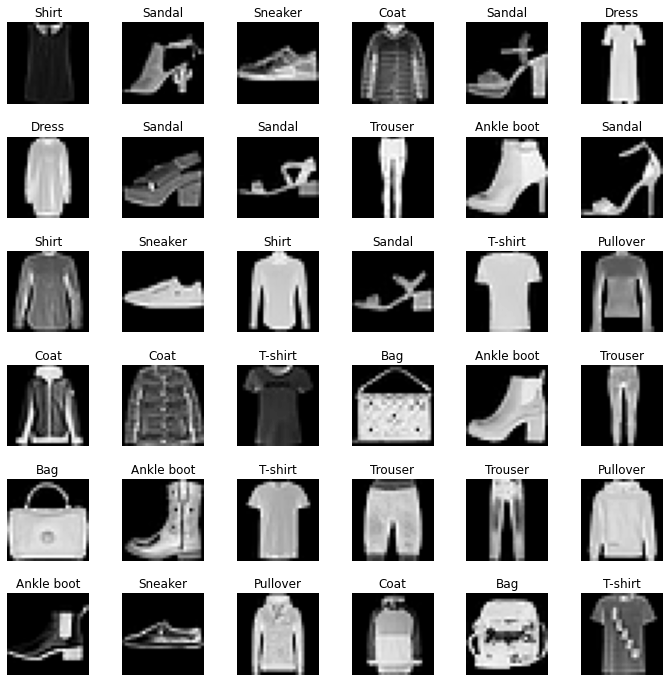

In [ ]:
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

grid_height = 6
grid_width = 6

fig, axes = plt.subplots(nrows=grid_height, ncols=grid_width, figsize=(12, 12))
axes = axes.ravel()

for i in range(grid_height * grid_width):
    # Draft random index to plot a random image from the dataset.
    drafted_index = np.random.randint(0, X_train.shape[0])
    axes[i].imshow(X_train[drafted_index], cmap='gray')
    axes[i].set_title(labels[y_train[drafted_index]])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
# Rescale images to range [0, 1] to facilitate model training.
X_train = X_train / 255
X_test = X_test / 255

X_train_noisy = []
X_test_noisy = []

# Apply noise to all images from the training set.
noise_factor = 0.2
for image in X_train:
    noisy_image = image + noise_factor * np.random.randn(28, 28)
    # Clip to make normally distributed array go back to range [0, 1].
    noisy_image = np.clip(noisy_image, 0, 1)
    X_train_noisy.append(noisy_image)

# Apply noise to all testing images with a larger noise factor.
noise_factor = 0.2
for image in X_test:
    noisy_image = image + noise_factor * np.random.randn(28, 28)
    noisy_image = np.clip(noisy_image, 0, 1)
    X_test_noisy.append(noisy_image)

X_train_noisy = np.array(X_train_noisy)
X_test_noisy = np.array(X_test_noisy)

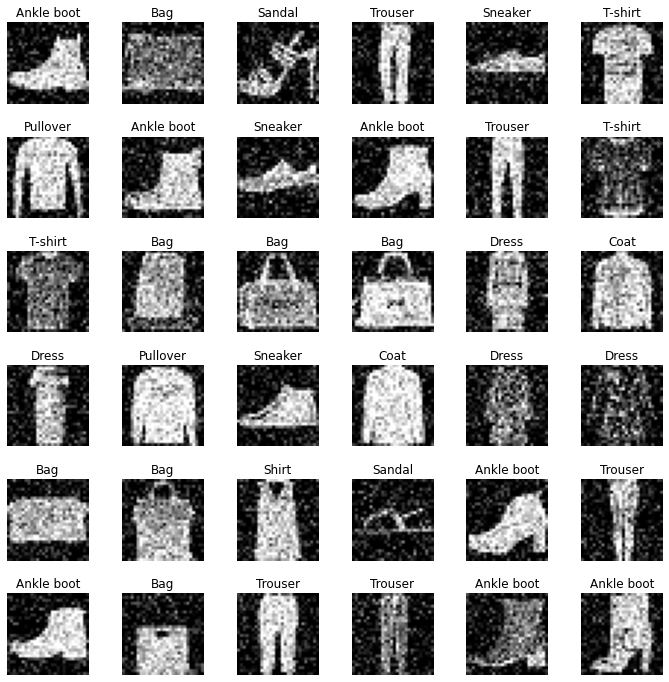

In [ ]:
grid_height = 6
grid_width = 6

fig, axes = plt.subplots(nrows=grid_height, ncols=grid_width, figsize=(12, 12))
axes = axes.ravel()

for i in range(grid_height * grid_width):
    # Draft random image from the noisy training set and plot it.
    drafted_index = np.random.randint(0, X_train_noisy.shape[0])
    axes[i].imshow(X_train_noisy[drafted_index], cmap='gray')
    axes[i].set_title(labels[y_train[drafted_index]])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
autoencoder = keras.models.Sequential()

autoencoder.add(keras.layers.Conv2D(32, (3, 3), padding='same',
                                    input_shape=(28, 28, 1)))
autoencoder.add(keras.layers.MaxPooling2D((2, 2), padding='same'))

autoencoder.add(keras.layers.Conv2D(16, (3, 3), padding='same'))
autoencoder.add(keras.layers.MaxPooling2D((2, 2), padding='same'))

autoencoder.add(keras.layers.Conv2D(8, (3, 3), padding='same'))

autoencoder.add(keras.layers.UpSampling2D((2, 2)))
autoencoder.add(keras.layers.Conv2DTranspose(16, (3, 3), padding='same'))

autoencoder.add(keras.layers.UpSampling2D((2, 2)))
autoencoder.add(keras.layers.Conv2DTranspose(1, (3, 3), padding='same',
                                    activation='sigmoid'))

autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 up_sampling2d_25 (UpSamplin  (None, 14, 14, 8)      

In [ ]:
autoencoder.compile(keras.optimizers.Adam(learning_rate=0.001),
                    loss='binary_crossentropy')

batch_size = X_train_noisy.shape[0] // 200

early_stopping_cb = keras.callbacks.EarlyStopping(min_delta=0.0001,
                                                  patience=10,
                                                  restore_best_weights=True)
lr_reducer_cb = keras.callbacks.ReduceLROnPlateau(patience=3,
                                                  min_lr=0.0001)

autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                batch_size=batch_size,
                epochs=100,
                callbacks=[early_stopping_cb, lr_reducer_cb],
                validation_split=0.15)

Epoch 1/100
170/170 [==============================] - 2s 10ms/step - loss: 0.3829 - val_loss: 0.3217 - lr: 0.0010
Epoch 2/100
170/170 [==============================] - 1s 8ms/step - loss: 0.3133 - val_loss: 0.3116 - lr: 0.0010
Epoch 3/100
170/170 [==============================] - 1s 8ms/step - loss: 0.3054 - val_loss: 0.3043 - lr: 0.0010
Epoch 4/100
170/170 [==============================] - 1s 8ms/step - loss: 0.3018 - val_loss: 0.3027 - lr: 0.0010
Epoch 5/100
170/170 [==============================] - 1s 8ms/step - loss: 0.2996 - val_loss: 0.3008 - lr: 0.0010
Epoch 6/100
170/170 [==============================] - 1s 8ms/step - loss: 0.2979 - val_loss: 0.2986 - lr: 0.0010
Epoch 7/100
170/170 [==============================] - 1s 8ms/step - loss: 0.2970 - val_loss: 0.2976 - lr: 0.0010
Epoch 8/100
170/170 [==============================] - 1s 8ms/step - loss: 0.2958 - val_loss: 0.2974 - lr: 0.0010
Epoch 9/100
170/170 [==============================] - 1s 8ms/step - loss: 0.2950 - val

1/1 [==============================] - 0s 15ms/step


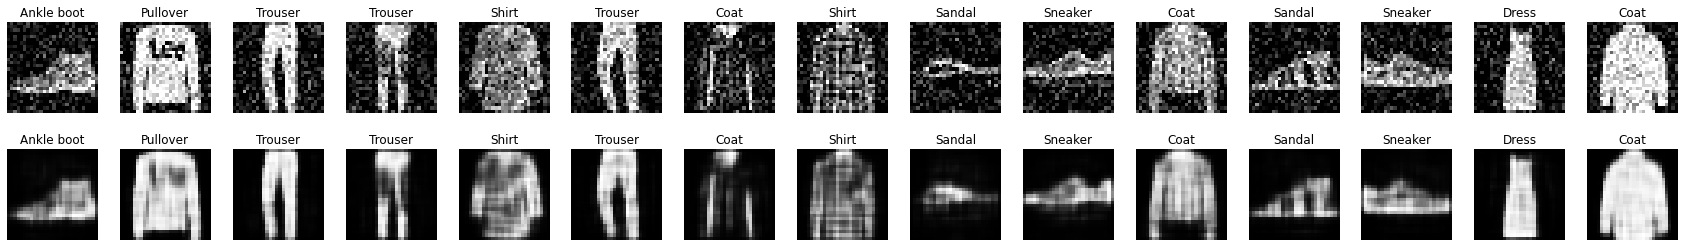

In [ ]:
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30, 4))
axes = axes.ravel()

for i in range(15):
    axes[i].imshow(X_test_noisy[i], cmap='gray')
    axes[i].set_title(labels[y_test[i]])
    axes[i].axis('off')
for i in range(15):
    axes[i + 15].imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    axes[i + 15].set_title(labels[y_test[i]])
    axes[i + 15].axis('off')
plt.subplots_adjust(hspace=0.4)